In [ ]:
import numpy as np                                   # linear algebra
import pandas as pd                                  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                      # library used for plotting data
from sklearn.model_selection import train_test_split # method used for splitting data set into trining and testing sets
import warnings                                      # libraries to deal with warnings
warnings.filterwarnings("ignore")

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)

numpy version: 1.23.5
pandas version: 1.5.3


In [ ]:
raw_data_train = pd.read_csv("/content/fashion-mnist_train.csv")
raw_data_test = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
raw_data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(raw_data_test)

10000

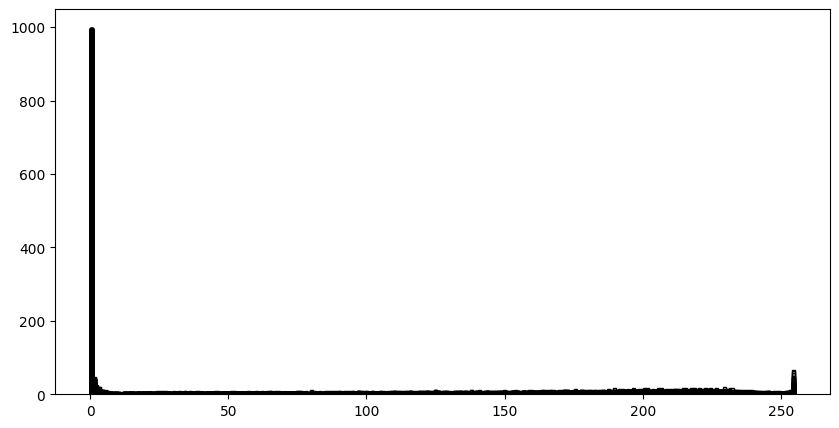

In [ ]:
subset_1 = raw_data_train.iloc[:1000,1:]
plt.subplots(figsize=(10,5))
plt.hist(subset_1, bins=256, fc='k', ec='k',histtype='step')
plt.show()

In [ ]:

raw_data_train.dtypes.unique()

array([dtype('int64')], dtype=object)

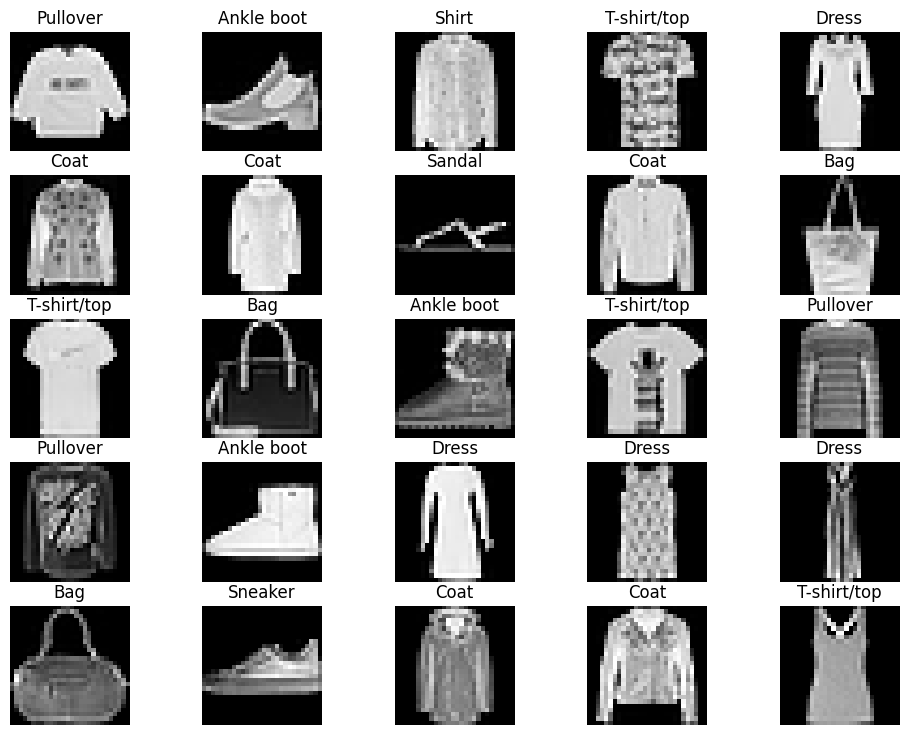

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,9))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    image_resized = np.resize(raw_data_train.iloc[i,1:].values,(28,28))
    plt.title(class_names[raw_data_train.iloc[i,0]])
    plt.imshow(image_resized, cmap='gray', interpolation='none')
    plt.axis('off')

In [ ]:
X = np.array(raw_data_train.iloc[:, 1:])
y = pd.get_dummies(np.array(raw_data_train.iloc[:, 0]))

# alternative:
#from keras.utils import to_categorical
#y = to_categorical(np.array(raw_data_train.iloc[:, 0]))

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
im_rows, im_cols = 28, 28
input_shape = (im_rows, im_cols, 1)

# Test data
X_test = np.array(raw_data_test.iloc[:, 1:])
y_test = pd.get_dummies(np.array(raw_data_test.iloc[:, 0]))

# train and validate sets
X_train = X_train.reshape(X_train.shape[0], im_rows, im_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], im_rows, im_cols, 1)
X_test = X_test.reshape(X_test.shape[0], im_rows, im_cols, 1)

# normalisation
X_train = X_train/255
X_validate = X_validate/255
X_test = X_test/255

print("X_train shape:", X_train.shape)
print("X_validate shape:", X_validate.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_validate shape:", y_validate.shape)
print("y_test shape:", y_test.shape)

X_train shape: (48000, 28, 28, 1)
X_validate shape: (12000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (48000, 10)
y_validate shape: (12000, 10)
y_test shape: (10000, 10)


In [ ]:
import keras # main keras package
from keras.models import Sequential # sequential model
from keras.layers import Dropout, Flatten, AveragePooling2D # layers with layers operations
from keras.layers import Dense,Conv2D  # layers types

In [ ]:
#from keras.layers.normalization import BatchNormalization

In [ ]:
num_classes = 10

model = Sequential()

model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(120, activation='relu'))

model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_2 (Avera  (None, 13, 13, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [ ]:
tracker = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=100,
                    validation_data=(X_validate, y_validate),
                    verbose=0)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.34332895278930664
Test accuracy: 0.8966000080108643


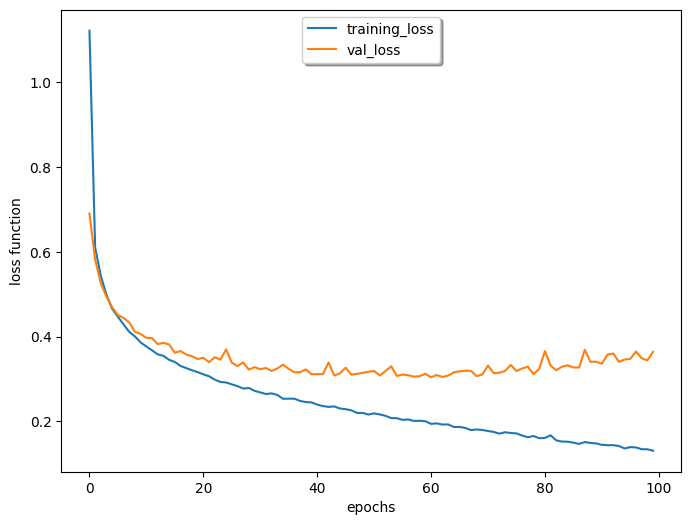

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(tracker.history["loss"], label = "training_loss")
ax.plot(tracker.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()